# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

## Краткое описание проекта

Основные данные проекта состоят из одного датафрейма - в нем данные про продажи компьютерных игр до 2016 года. Эти данные в рамках работы нужно будет обработать - привести к змеиному регистру, нужному типу, избавиться от пропусков и дубликатов, а также проверить, есть ли какие-либо аномальные значения.

Основная цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных 

Вот какие данные есть в наборе:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### План работы будет следующим:

****1. Изучение и предобработка данных****

Посмотрим на содержание датафрейма, изучим, какие типы данных и их объем он содержит. На этом этапе изучим, какие типы данных лучше изменить, и проведем предобработку - приведем данные к нужному типу, избавимся от дубликатов и пропусков (при наличии).


****2. Исследовательский анализ данных****

Визуализируем содержимое датафрейма с помощью гистограмм и других способов отображения данных. Это позволит лучше понять, есть ли аномальные значения, и выдвинуть гипотезы, чем их можно объяснить. Кроме того, на этом этапе изучим важные параметры по продажам компьютерных игр.


****3. Портрет пользователя в каждом регионе****

Определим для каждого региона самые популярные платформы и жанры. Попробуем выявить, влияет ли рейтинг ESRB на продажи в каждом из регионов.


****4. Проверка гипотез****

С помощью методов статистического анализа попробуем опровергнуть или подтвердить выдвинутые бизнесом гипотезы. Обрабатоем результаты анализа и добавим выводы, которые позволят бизнесу повысить эффективность процессов или лучше узнать пользователей.


****5. Общие выводы****

Соберем все выводы, которые получится получить в рамках проекта, для удобства в одном блоке. 

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab
import seaborn as sns
from termcolor import colored

### Шаг 1. Загрузка и знакомство с данными

In [2]:
import os

pth1 = '/datasets/games.csv'
pth2 = '/Users/macbookpro/Downloads/games.csv'

if os.path.exists(pth1):
    games = pd.read_csv(pth1)
elif os.path.exists(pth2):
    games = pd.read_csv(pth2)
else:
    print('Something is wrong')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
print(colored('Информация о датафрейме с играми:', 'red', attrs=['bold']))
games.info()

Информация о датафрейме с играми:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Выводы:

1. В датафрейме 11 столбцов и 16715 строк. Он содержит игровые тайтлы с указанием платформы, года выпуска игры, жанром, продажами в Северной Америке, Европе, Японии и других странах (в млн шт), а еще оценки критиков, пользователей и рейтинг от ESRB.

2. Мы видим, что названия столбцов нужно будет привести к змеиному регистру для единства стиля.

3. Из типов данных обработать нужно будет год релиза (перевести в int). 

4. Видим, что много пропусков данных есть в столбцах с оценкой критиков, оценкой пользователях и рейтинге. На следующем этапе решим, что будем с ними делать. Уже вижу, что полностью удалить их не получится, так как пропуски занимают большую долю от датафрейма.

5. Возможно, есть дубликаты в столбце с жанрами игр. Проверим это на этапе предобработки.

### Шаг 2. Подготовка данных

Начнем с малого: приведем названия столбцов к змеиному регистру, сохранив сами названия:

In [4]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Готово! Теперь посмотрим на колонки повнимательнее. 

In [5]:
#изучим уникальные значения в колонке с оценками пользователей, чтобы увидеть, какие нужно обработать
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Вижу, что есть стринговое значение 'tbd': быстрый серчинг показал, что это аббревиатура to be decided или to be determined. Скорее всего, у игр с таким значением пока мало оценок пользователей. Еще есть nan: предположу, что значения потерялись из-за технической ошибки или данные были изначально недоступны при выгрузке.

In [6]:
#изучим пропуски по имени
games[games.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки: их удалим в следующем шаге, так как восстановить название игры не получится, а без него они не особенно нужны в датафрейме. Да и содержат эти строки много других NaN-ов.

In [7]:
#изучим пропуски по жанру
games[games.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
#изучим пропуски по году выпуска
games[games.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#изучим пропуски по рейтингу
games[games.rating.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски по названию игр, жанру и году выпуска тоже отбросим в следующем шаге: их не так много, а восстанавливать по открытым источникам будет очень долго.

В рамках проекта не будем совсем удалять все пропущенные значения - вместо этого в будущих шагах будем учитывать пропуски и делать срезы с "хорошими" данными, которые будем использовать для дальнейшего анализа. ****Вот что отбросим:****

1. Два пропуска в name - пропущенных значений немного, а ресурсы на данные по нужным играм из открытых источников тратить не хочется.
2. 269 пропусков в годе выпуска - пропущенных значений немного, примерно 1,6% от общего числа. По открытым источникам год восстановить трудно, да и кажется, что имеющихся данных хватит для анализа.
3. Жанр - отбросим два пропущенных значения.

****Что сохраним:****
1. Не будем отбрасывать NaN значения в столбце с оценками критиков. Мы не знаем, с какого именно портала подтягивались оценки критиков, а таких источников может быть тысяча. Вместо этого заменим их на нули.
2. Аналогично поступим с оценками пользователей. Мы видим, что внутри есть строка 'tbd'. Это английская аббревиатура 'to be decided': скорее всего, она означает, что по игре пока недостаточно оценок пользователей, чтобы вывести общее значение по ним. Заменим tbd на  нули и также не будем использовать их в рамках следующих шагов.
3. С рейтингом пропуски обработать тоже будет проблематично: организация ESRB появилась в 1994 году (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board). Часть игр в датафрейме вышла раньше этого периода. Заменим пропуску на строчку "No Rating": нет рейтинга.

In [10]:
#отбросим из датафрейма строки с NaN по правилам выше
games = games.dropna(subset=['name', 'year_of_release', 'genre'])

In [11]:
#выключим SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#обработаем другие значения
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True).astype('float')
games['user_score'] = games['user_score'].replace(np.nan, 0, regex=True).astype('float')
games['critic_score'] = games['critic_score'].replace(np.nan, 0, regex=True).astype('float')
games['rating'] = games['rating'].replace(np.nan, 0, regex=True)
games['rating'] = games['rating'].replace(0, 'No Rating', regex=True)
games['year_of_release'] = games['year_of_release'].astype('int')

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No Rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No Rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,No Rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No Rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No Rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No Rating


In [12]:
#Изучим, есть ли в датафрейме явные и неявные дубликаты:
    
clear_duplicates = games.duplicated().sum()
unclear_duplicates = games.name.value_counts().count()

print(f'Явных дубликатов в датафрейме: {clear_duplicates}')
print(f'Тайтлов в игре: {unclear_duplicates}, а строк: {len(games)}')

Явных дубликатов в датафрейме: 0
Тайтлов в игре: 11426, а строк: 16444


Мы видим, что явных дубликатов в очищенном датафрейме нет. Возможно, что есть неявные дубликаты, так как количество тайтлов и строк отличается. Скорее всего, тайтлы присутствуют на разных игровых платформах, а значит, повторы тайтлов не являются неявными дубликатами: проверим эту гипотезу.

In [13]:
games.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No Rating
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,0.0,0.0,No Rating


На примере одной из игр видим, что тайтлы действительно могут присутствовать на разных платформах, а значит, повторы тайтлов не являются дубликатами.

Добавим столбец total_sales, содержащий суммарные продажи во всех регионах:

In [14]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No Rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No Rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No Rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No Rating,0.01


In [15]:
# Код ревьюера

games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 0)

na_sales       4341.42
eu_sales       2399.68
jp_sales       1290.64
other_sales     782.63
dtype: float64

### Выводы:
    
1. Привели названия столбцов к змеиному регистру, сохранив сами названия.


2. Отбросили пропуски в столбцах, где их было не критически много: это названия, год выпуска и жанр. Убрали меньше 2% содержания датафрейма: допустимая обработка.


3. Поняли, что TBD в столбце с оценками пользователей - аббревиатура to be decided. Заменили ее на ноль, тк фактически оценки пользователей у игры еще нет.


4. Пропуски в столбцах с оценками пользователей и критиков + рейтингом отбросить не можем: их слишком много. Вместо этого пока заменим NaN на нули и будем держать в голове эти нули при следующих этапах анализа.


5. Проверили датафрейм на наличие явных и неявных дубликатов: их нет.


6. Создали столбец с суммарными продажами во всех регионах total_sales.

### Шаг 3. Исследовательский анализ данных

****Сперва изучим, сколько игр выпускалось в разные годы:****

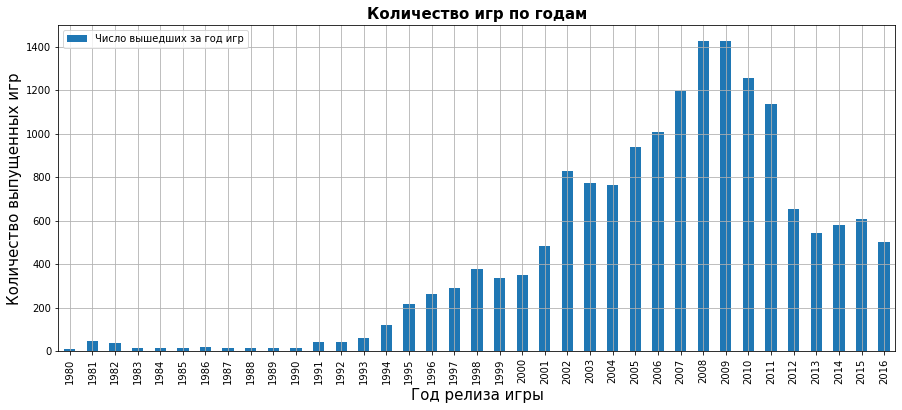

In [16]:
games_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_by_year.columns=['Число вышедших за год игр']

games_by_year.plot(grid=True, kind='bar', figsize=(15,6))
plt.title('Количество игр по годам', fontweight='bold', fontsize=15)
plt.xlabel('Год релиза игры', fontsize=15)
plt.ylabel('Количество выпущенных игр', fontsize=15)
plt.show()

По графику мы видим, что число вышедших игр начинает расти с 1994 года: до этого в год выходило меньше 150 игр. Пик по числу вышедших игр в датафрейме приходится на 2008-2009 годы: тогда их число превысило 1400 релизов в год.

Это можно объяснить развитием технологий и широким внедрением ПК, которое началось как раз в 90-е и нулевые годы. При этом на 2010 пришлось широкое распространение социальных сетей и онлайн-сервисов, которые гипотетически могли привести к падению спроса на игры для ПК и игровых консолей. Кроме того, начался бум мобильных приложений, которые тоже в теории могли заменить пользователям консоли.

В рамках следующих шагов исследования мы можем не использовать данные за периоды до 1994 года. Кажется, эта выборка датафрейма слишком мала, чтобы делать какие-либо выводы по поводу игр за этот период.

****Теперь посмотрим, как распределялись продажи по платформам:****

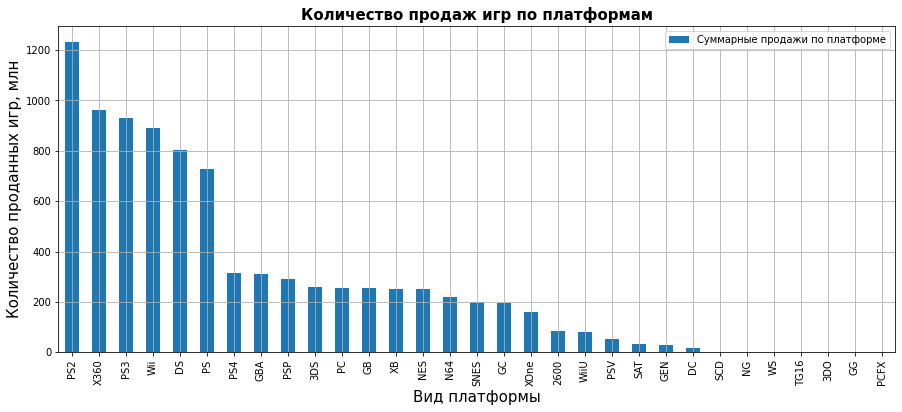

In [17]:
games_by_platform = games.pivot_table(index='platform', 
                                      values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                                         ascending=False)
games_by_platform.columns =['Суммарные продажи по платформе']

games_by_platform.plot(grid=True, kind='bar', figsize=(15,6))
plt.title('Количество продаж игр по платформам', fontweight='bold', fontsize=15)
plt.xlabel('Вид платформы', fontsize=15)
plt.ylabel('Количество проданных игр, млн', fontsize=15)
plt.show()

По графику мы видим, что в топ-5 самых популярных платформ по продажам за весь период входят PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii и Nintendo DS. На них приходится от 800 млн до 1,2 млрд проданных игр за все годы, по которым есть данные в нашем датафрейме. Построим распределение для платформ по годам в следующей клетке. 

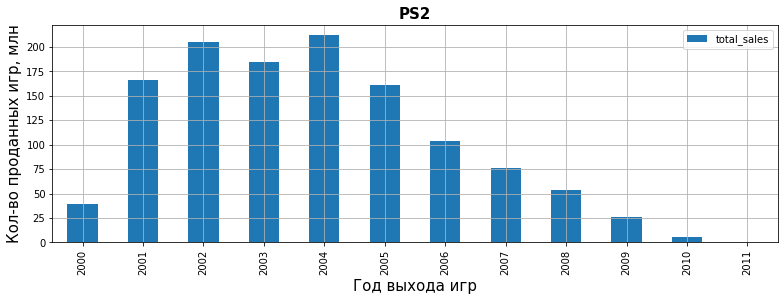

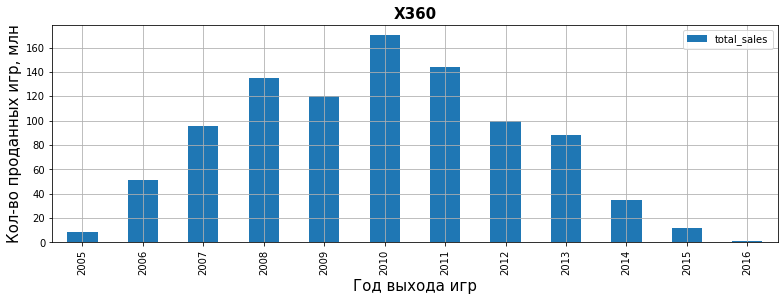

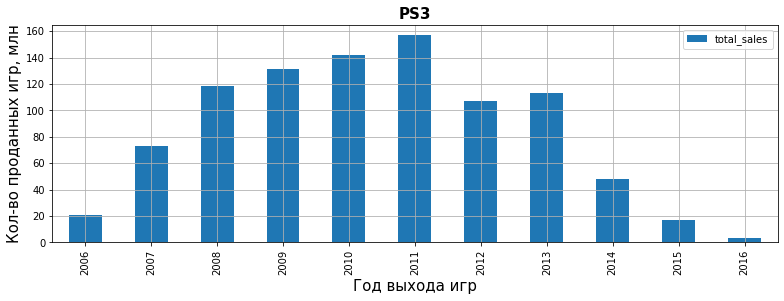

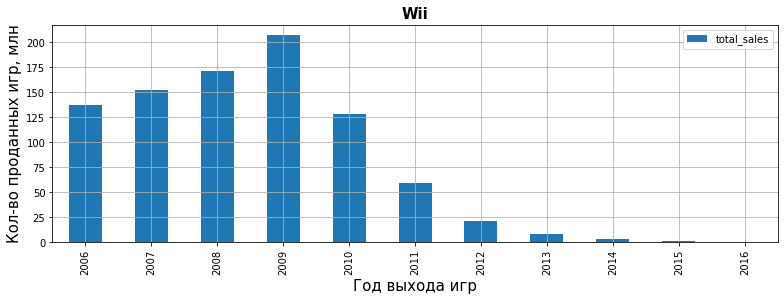

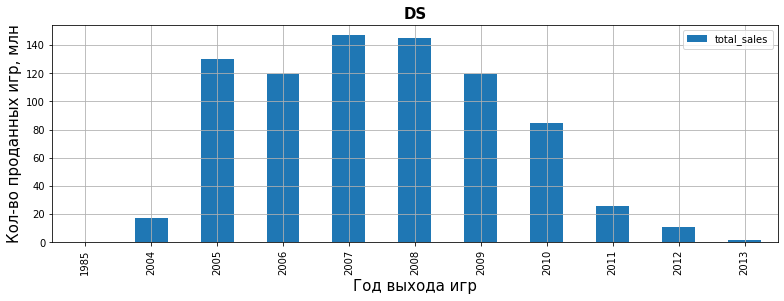

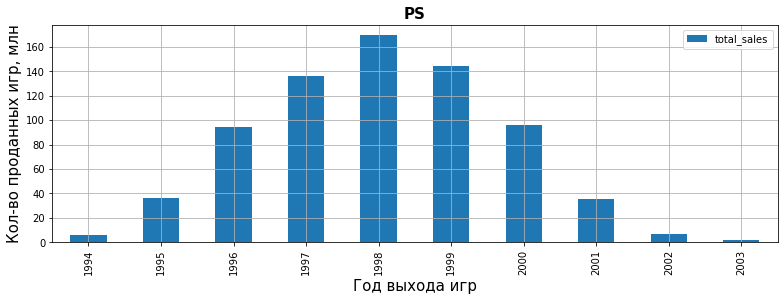

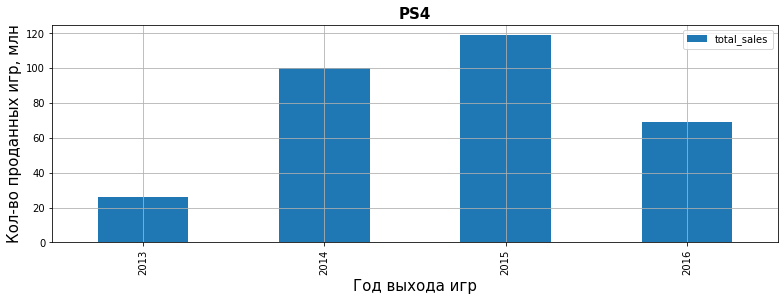

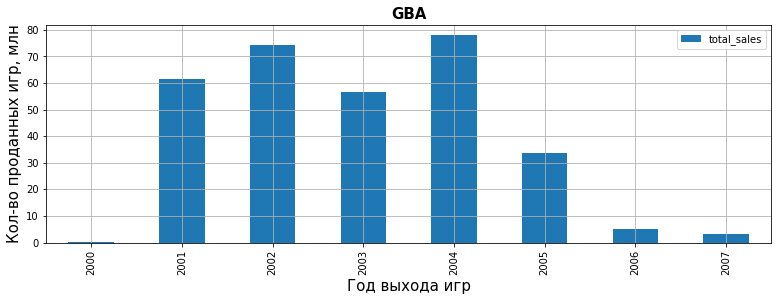

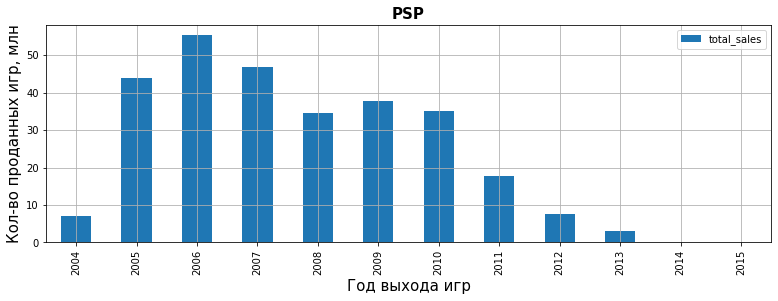

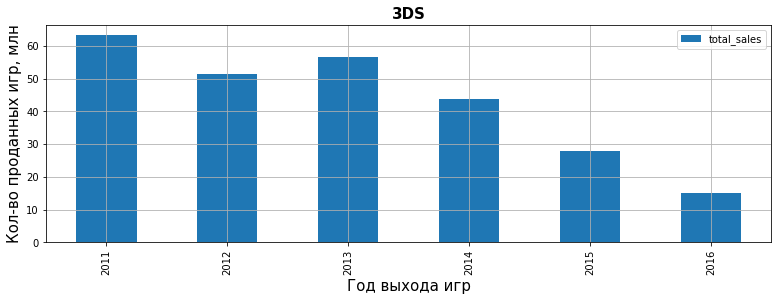

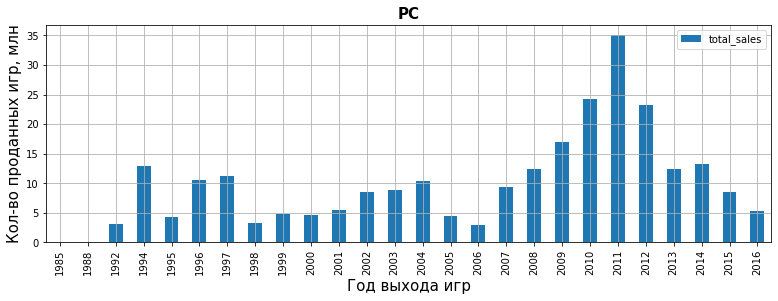

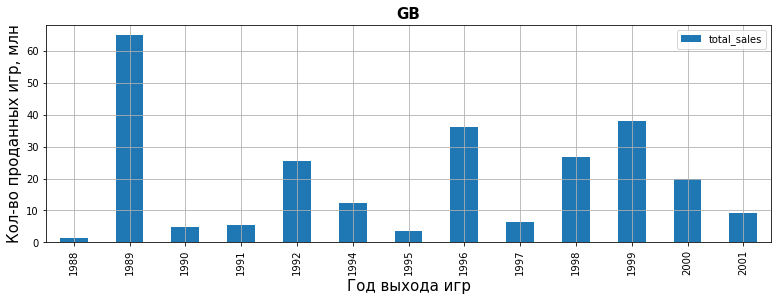

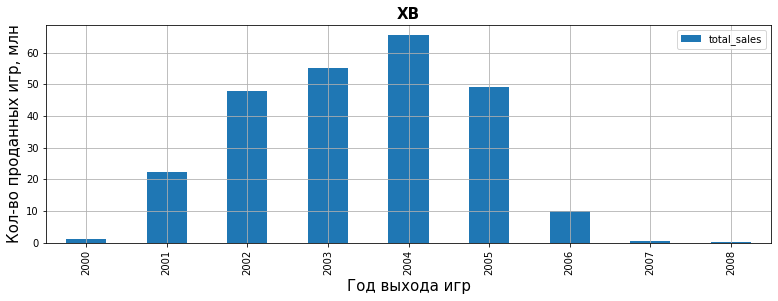

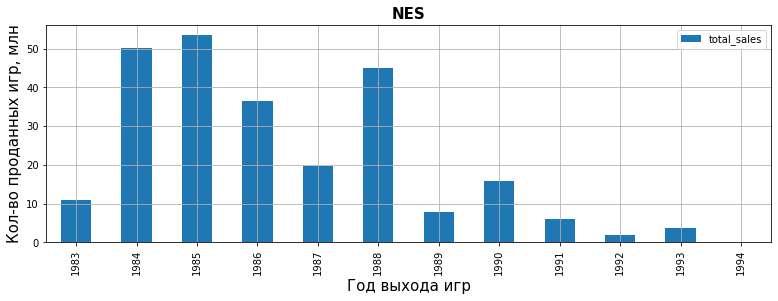

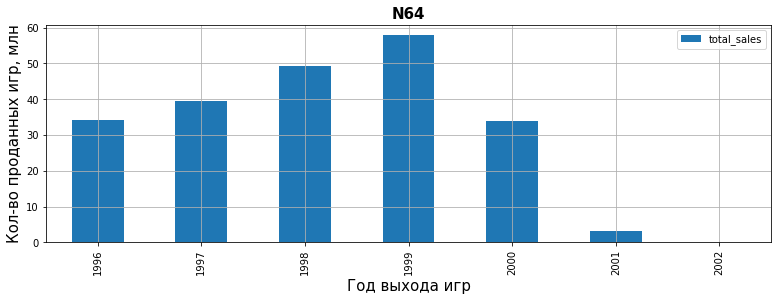

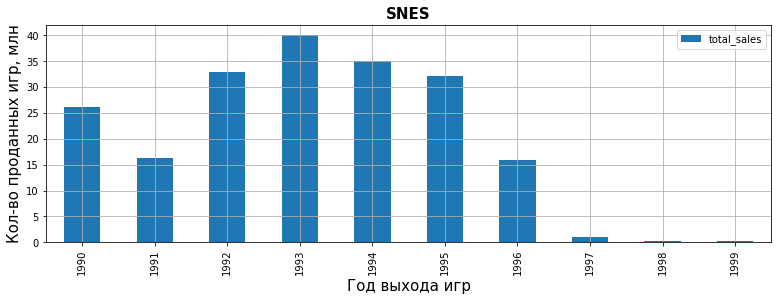

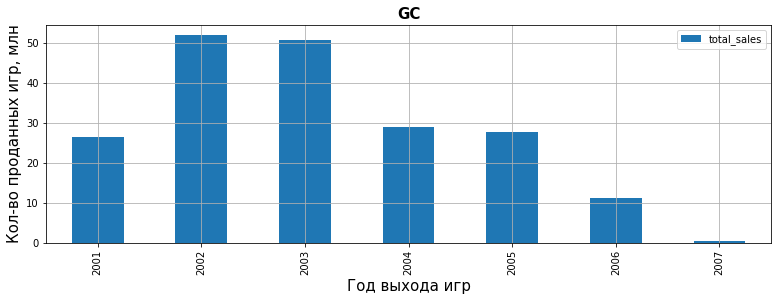

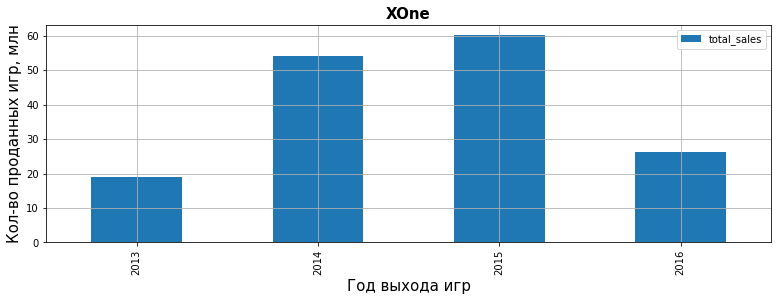

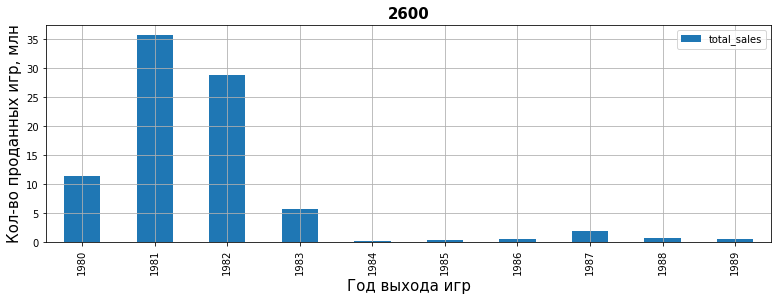

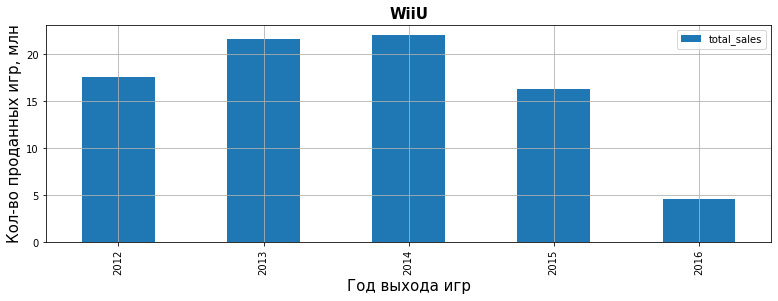

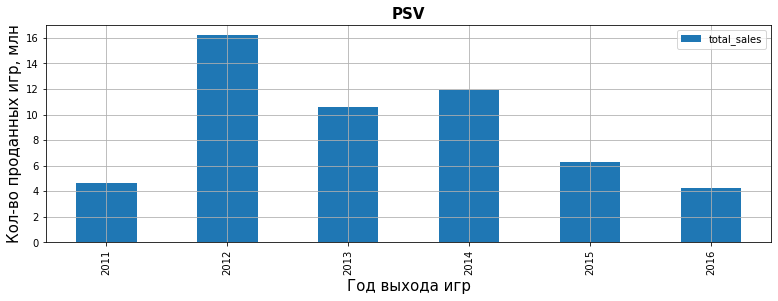

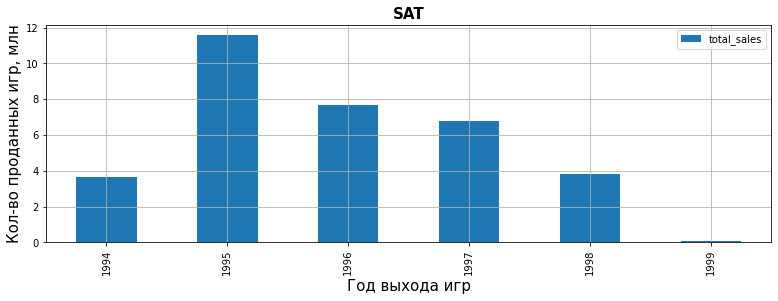

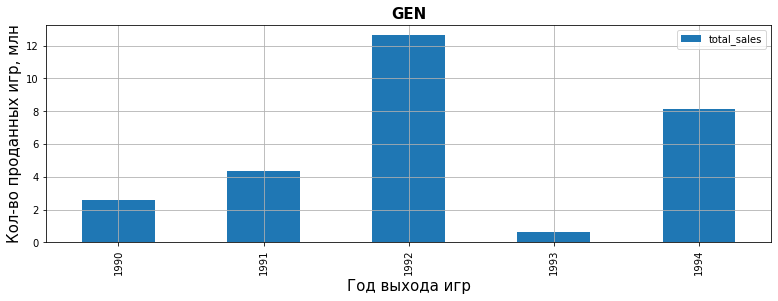

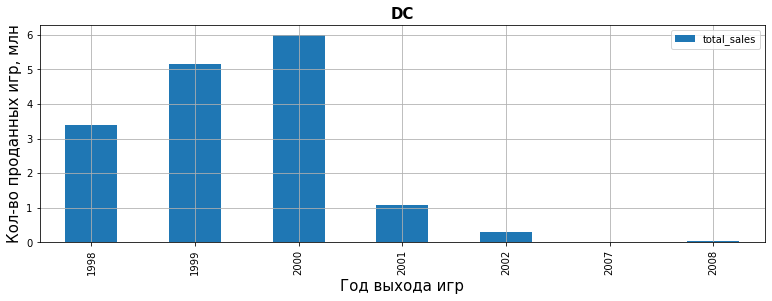

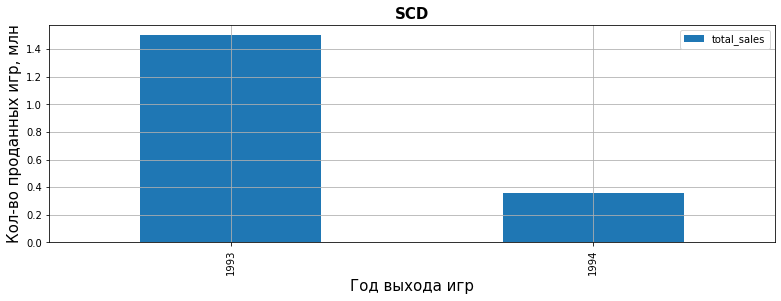

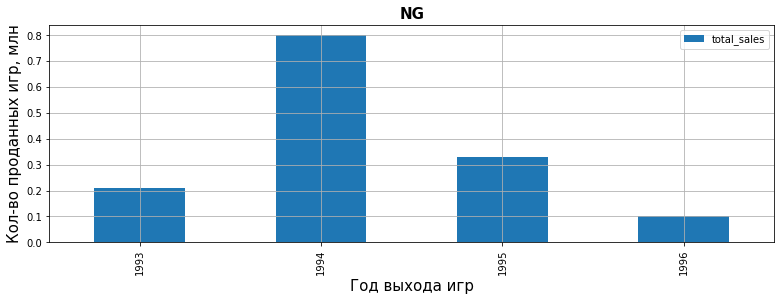

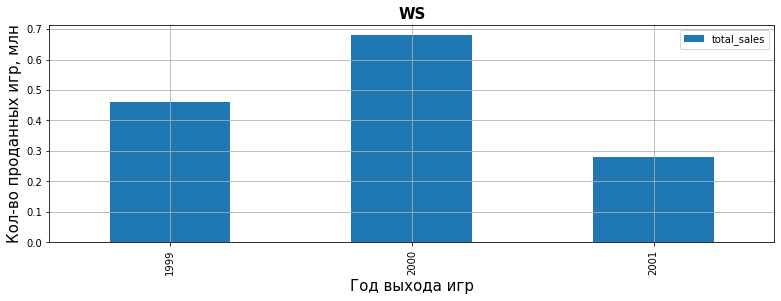

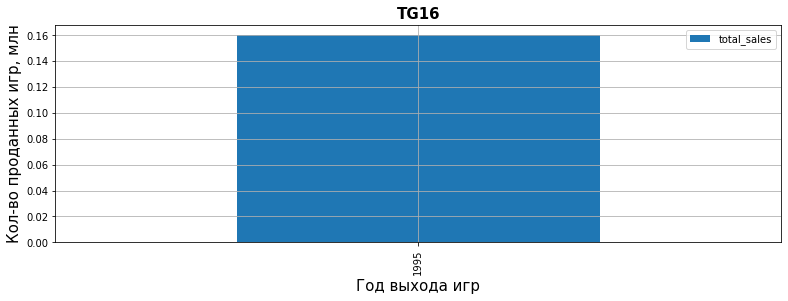

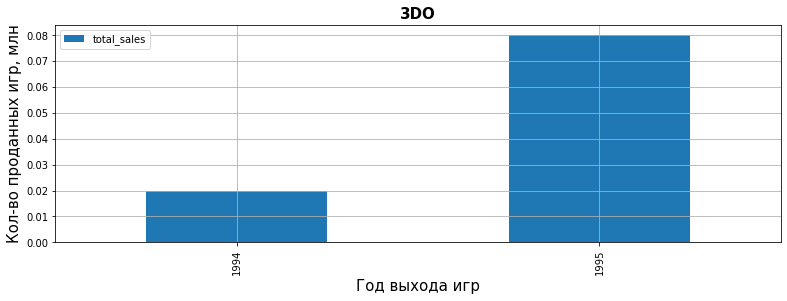

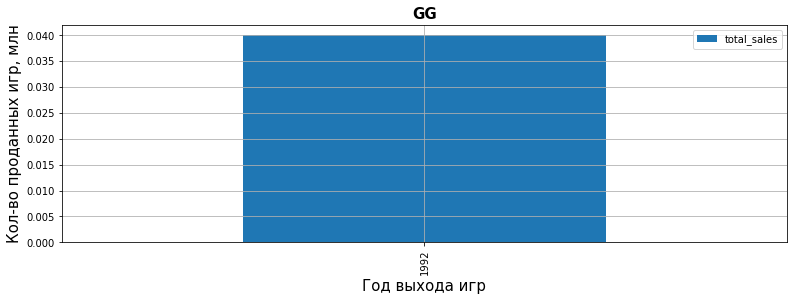

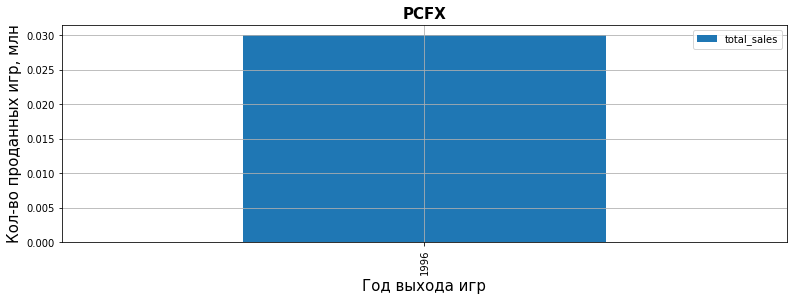

In [18]:
#создадим список с нужными значениями
platform_grouped = games_by_platform.reset_index()
values = platform_grouped['platform'].unique()

#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for platform in values:
    games[games['platform'] == platform].pivot_table(index='year_of_release', 
                                                     values='total_sales', 
                                                     aggfunc='sum').plot(
        kind='bar', grid=True, figsize=(13,4))
    plt.title(platform, fontweight='bold', fontsize=15)
    plt.xlabel('Год выхода игр', fontsize=15)
    plt.ylabel('Кол-во проданных игр, млн', fontsize=15)
    plt.show()

****Посчитаем по графикам топ-5 платформ, за какой характерный срок появляются новые и исчезают старые платформы:****

1. PlayStation 2: достигла пика за 4 года, почти исчезла за 6 лет


2. Xbox 360: достигла пика за 5 лет, почти исчезла за 4 года


3. PlayStation 3: достигла пика за 5 лет, почти исчезла за 3 года


4. Nintendo Wii: достигла пика за 3 года, почти исчезла за 4 года


5. Nintendo DS: достигла пика за 4 года, почти исчезла за 4 года


6. PlayStation: достигла пика за 5 лет, почти исчезла за 4 года

В среднем топ-5 платформ достигают пика за период в 3-5 лет, а исчезают за период в 3-6 лет. Получается, что средний жизненный цикл одной платформы составляет 6-11 лет.

Мы видим также, что часть платформ появляются и исчезают очень быстро: это TG16, 3D0, GG, PCFX. Эти платформы отображены в нашем датафрейме всего одним годом продаж. Можно предположить, что они не стали успешными продуктами из-за выхода более популярных конкурентов, устаревания или отсутствия интересных пользователям игр на этих платформах.

Исходя из графиков, можно предположить, что актуальным перидом будет промежуток с 2010 и до 2016 года. На этот момент приходится новая тенденция сокращения рынка консолей: топ-5 платформ по продажам стали быстро терять позиции, на смену им начали выходить новые (PS4 и PS Vita, Nintendo 3DS, Nintendo WiiU). При этом период связан и с ростом популярности игр на ПК, пик для которых пришелся на 2011 год. Этот период захватывает и средний жизненный цикл платформ.

Кроме того, этот временной отрезок позволяет отбросить платформы, которые не стали успешными и быстро потеряли темпы роста по продажам игр. 

In [19]:
current_period = games[games['year_of_release'] >= 2010]
current_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0.0,0.0,No Rating,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No Rating,0.01


Чтобы понять, какие платформы в актуальный период лидируют, растут или падают, составим линейную диаграмму по продажам игр: 

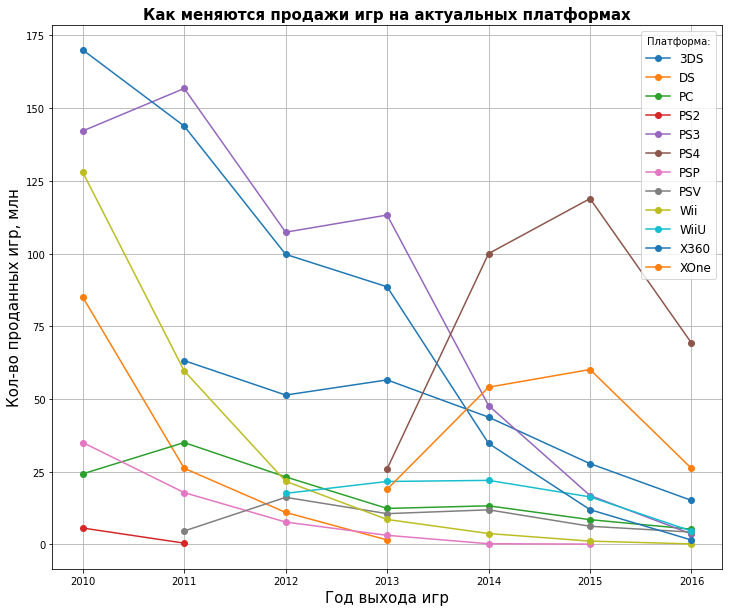

In [20]:
current_period.pivot_table(index='year_of_release', 
                           columns = 'platform', values='total_sales', 
                           aggfunc='sum').plot(figsize=(12, 10), grid=True, marker='o')
plt.title('Как меняются продажи игр на актуальных платформах', fontweight='bold', fontsize=15)
plt.xlabel('Год выхода игр', fontsize=15)
plt.ylabel('Кол-во проданных игр, млн', fontsize=15)
plt.legend(title='Платформа:', fontsize=12)
plt.show()

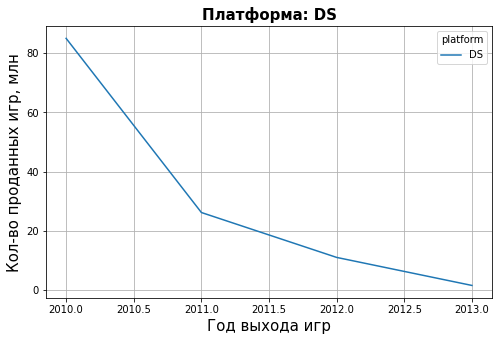

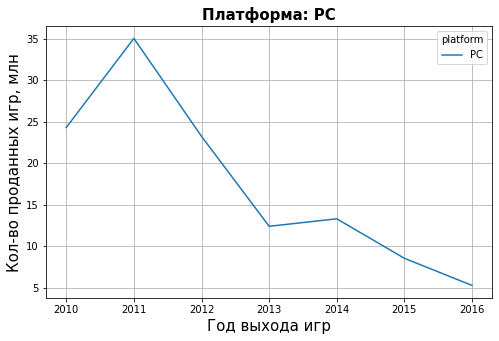

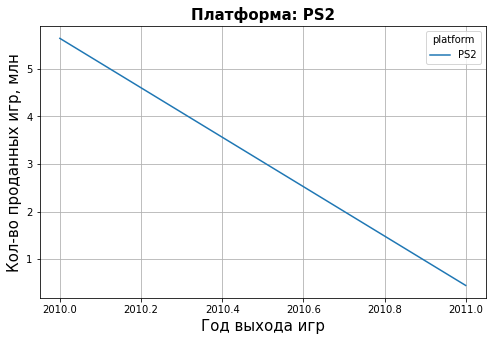

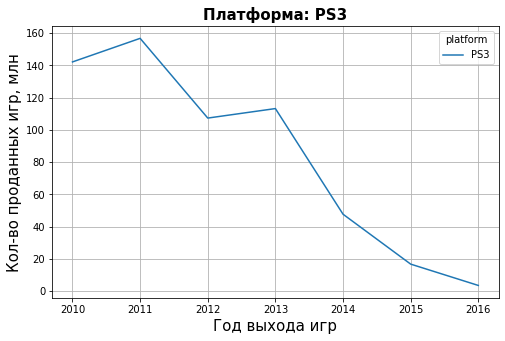

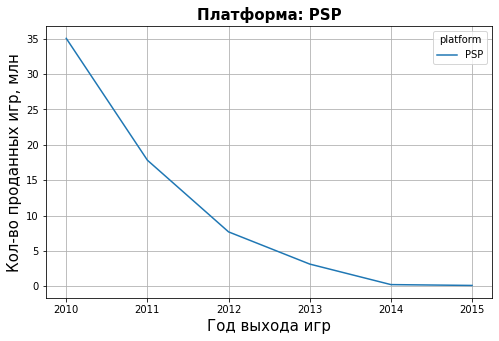

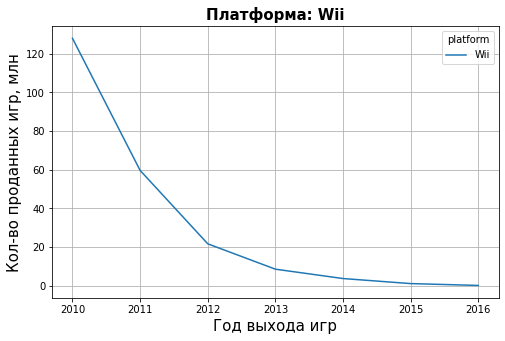

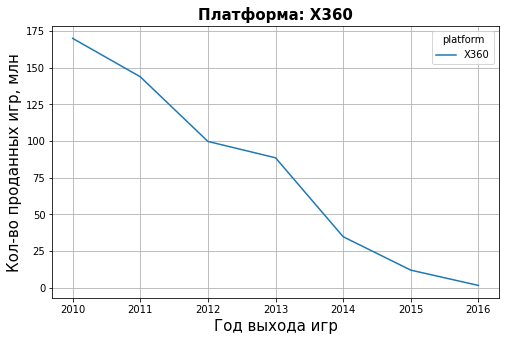

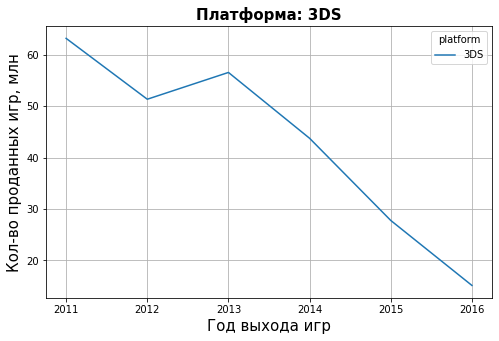

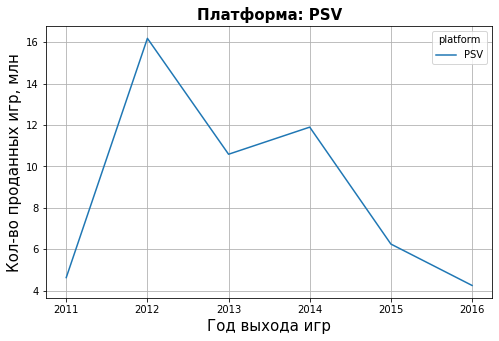

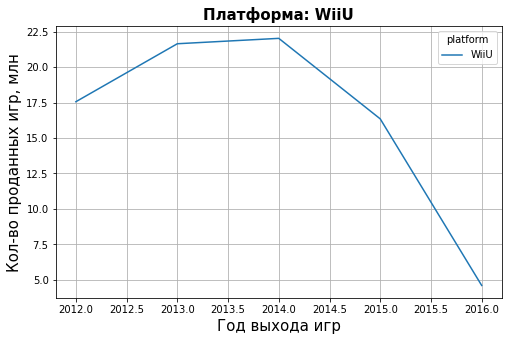

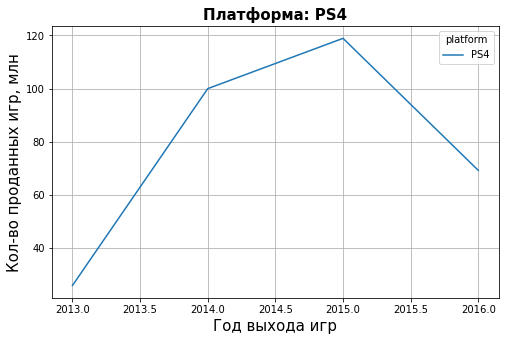

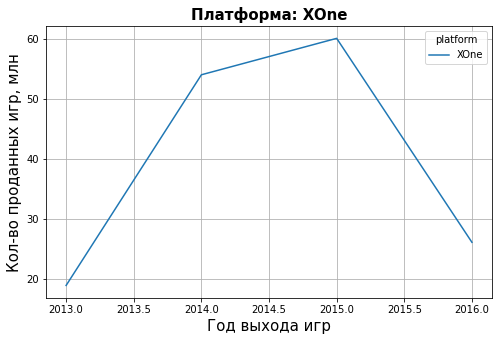

In [21]:
games_by_year = current_period.pivot_table(index=['year_of_release', 'platform'], 
                                      values='total_sales', aggfunc='sum').reset_index()

values = games_by_year['platform'].unique()

#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for platform in values:
    current_period[current_period['platform'] == platform].pivot_table(index='year_of_release', 
                                                     columns = 'platform', 
                                                     values='total_sales', 
                                                     aggfunc='sum').plot(grid=True, figsize=(8,5))
    plt.title(f'Платформа: {platform}', fontweight='bold', fontsize=15)
    plt.xlabel('Год выхода игр', fontsize=15)
    plt.ylabel('Кол-во проданных игр, млн', fontsize=15)
    plt.show()

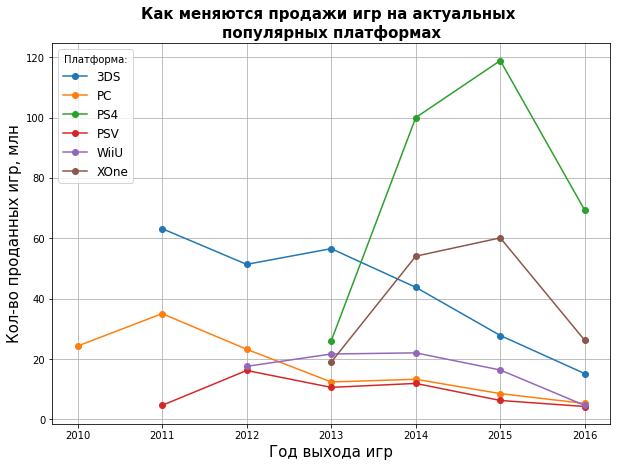

In [22]:
top_current_platforms_list = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']
current_period_grouped = current_period.query('platform in @top_current_platforms_list')

platform_years = current_period_grouped.pivot_table(index='year_of_release', 
                           columns = 'platform', values='total_sales', 
                           aggfunc='sum').plot(figsize=(10, 7), grid=True, marker='o')

plt.title('Как меняются продажи игр на актуальных \nпопулярных платформах', fontweight='bold', fontsize=15)
plt.xlabel('Год выхода игр', fontsize=15)
plt.ylabel('Кол-во проданных игр, млн', fontsize=15)
plt.legend(title='Платформа:', fontsize=12)
plt.show()

Посмотрим на описание столбца общих продаж по платформам:

По графикам выше мы видим общее падение рынка к 2016 году: роста к 2016 году нет ни у одной платформы. При этом лидируют по продажам PlayStation 4, Xbox One, Nintendo 3DS. Сильнее всего упали NinTendo WiiU, PC, PlayStation Vita.

PlayStation 2, PSP и Nintendo DS при этом перестали выходить: не будем брать эти значения для следующих этапов. Отбросим и Nintendo Wii, так как продажи этой платформы упали до нуля.

Кроме того, создадим срез по лидерам продаж: именно по этим платформам будем готовить прогноз по кампании на 2017 год.

In [23]:
old_platforms = ['PS2', 'DS', 'PSP', 'Wii']
current_period = current_period.query('platform != @old_platforms')

top_current_platforms_list = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']
top_current_platforms = current_period.query('platform in @top_current_platforms_list')

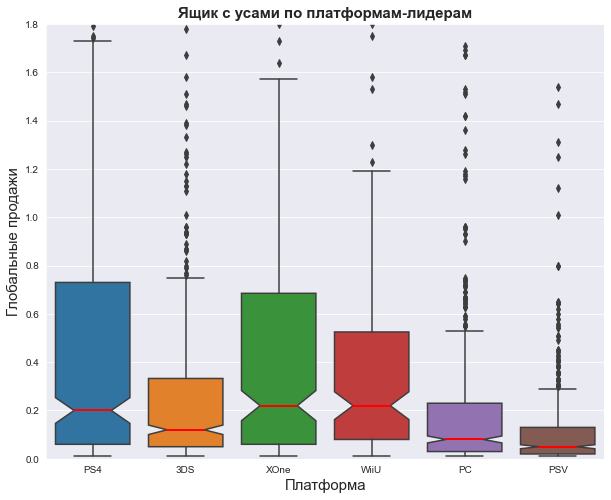

In [24]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(data=top_current_platforms, x='platform', y='total_sales', notch=True, 
            medianprops={"color": "red", "linewidth": 2})
plt.title('Ящик с усами по платформам-лидерам', fontweight='bold', fontsize=15)

#установим максимальный масштаб в 1,8 млн проданных копий по игре, чтобы сделать график более наглядным
plt.ylim(0, 1.8)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи', fontsize=15)
plt.show()

Мы видим, что медианные значения отличаются для всех выбранных платформ. В среднем по продажам игр лидируют WiiU и Xbox One, затем PlayStation 4, Nintendo 3DS, PC, а на последнем месте - PlayStaion Vita. При этом максимальное значение по продажам одной игры - у PlayStation 4: оно почти достигает 1.8 млн проданных копий. 

****Изучим, как влияют отзывы пользователей и критиков, на примере самой популярной платформы WiiU:****

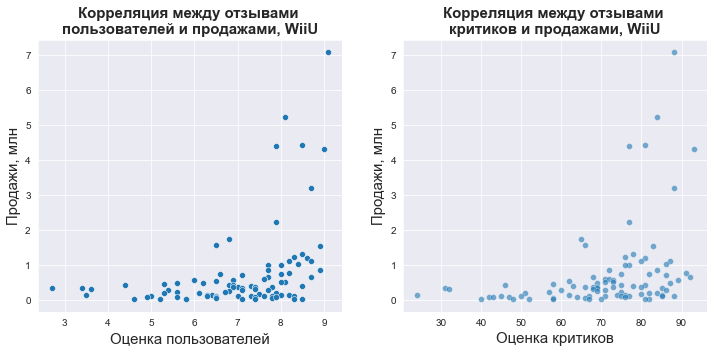

Коэффициент корреляции отзывов пользователей и продаж игр на WiiU: 0.39
Коэффициент корреляции отзывов критиков и продаж игр на WiiU: 0.35


In [25]:
#отбросим в срезе нулевые оценки критиков и пользователей
WiiU_data = top_current_platforms.query("platform == 'WiiU' and user_score != 0 and critic_score != 0")

_, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=WiiU_data, x='user_score', y='total_sales', ax=ax[0])
sns.scatterplot(data=WiiU_data, x='critic_score', y='total_sales', ax=ax[1], alpha=0.6)
ax[0].set_title('Корреляция между отзывами \nпользователей и продажами, WiiU', fontweight='bold', fontsize=15)
ax[1].set_title('Корреляция между отзывами \nкритиков и продажами, WiiU', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Оценка пользователей', fontsize=15)
ax[0].set_ylabel('Продажи, млн', fontsize=15)
ax[1].set_xlabel('Оценка критиков', fontsize=15)
ax[1].set_ylabel('Продажи, млн', fontsize=15)

plt.show()

WiiU_user_score_corr = WiiU_data['user_score'].corr(WiiU_data['total_sales'])
WiiU_critic_score_corr = WiiU_data['critic_score'].corr(WiiU_data['total_sales'])

print(f'Коэффициент корреляции отзывов пользователей и продаж игр на WiiU: {WiiU_user_score_corr.round(2)}')
print(f'Коэффициент корреляции отзывов критиков и продаж игр на WiiU: {WiiU_critic_score_corr.round(2)}')

На примере WiiU мы видим, что между отзывами и продажами игр есть положительная линейная связь: чем выше отзыв, тем больше стоит ожидать продаж. При этом эта связь не очень сильная: коэффициент меньше 1. Интересно, что в случае с отзывами пользователей WiiU связь немного сильнее, чем в случае с отзывами критиков. 

****Изучим коэффициенты корреляции между отзывами критиков и пользователей и продажами для других популярных платформ:****

In [26]:
#отбросим в новом срезе нулевые значения оценок для подсчета коэффициента корреляции
top_platforms_corr = top_current_platforms.query('user_score != 0 and critic_score != 0')

corr_user = top_platforms_corr.groupby('platform')['user_score'].corr(top_platforms_corr['total_sales'])
corr_critic = top_platforms_corr.groupby('platform')['critic_score'].corr(top_platforms_corr['total_sales'])

print(colored('Корреляция продаж игр и оценок пользователей:', 'red', attrs=['bold']))
print(corr_user)
print()
print(colored('Корреляция продаж игр и оценок критиков:', 'red', attrs=['bold']))
print(corr_critic)

Корреляция продаж игр и оценок пользователей:
platform
3DS     0.232089
PC     -0.013300
PS4    -0.033625
PSV     0.038380
WiiU    0.391848
XOne   -0.094003
Name: user_score, dtype: float64

Корреляция продаж игр и оценок критиков:
platform
3DS     0.338904
PC      0.336668
PS4     0.405895
PSV     0.131619
WiiU    0.350882
XOne    0.410422
Name: critic_score, dtype: float64


Мы видим, что для других популярных платформ характерна слабая взаимосвязь между отзывами пользователей и продажами игр. Примечательно, что в половине случаев (PC, PS4, Xbox One) эта связь отрицательная. Вероятно, это связано с преобладанием низких оценок над положительными.

В случае с оценками критиков дело обстоит чуть иначе: положительная связь между ними и продажами игр чуть выше, но в целом нельзя сказать, что критики сильно влияют на продажи.

****Посмотрим на общее распределение жанров игр по продажам:****

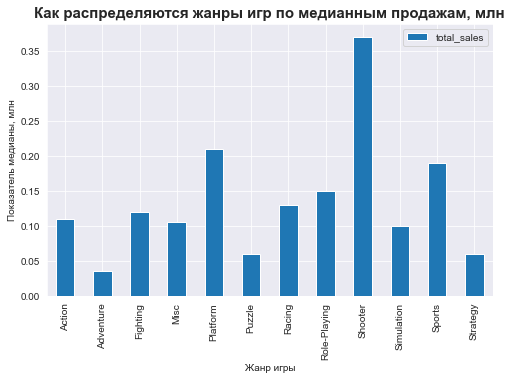

In [27]:
(top_current_platforms
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
    .plot(kind='bar', figsize=(8,5), y= 'total_sales')
)
plt.title('Как распределяются жанры игр по медианным продажам, млн', fontweight='bold', fontsize=15)
plt.legend(fontsize=10)
plt.ylabel('Показатель медианы, млн')
plt.xlabel('Жанр игры')

plt.show()

По диаграмме мы видим, что самое большое значение медианных продаж приходится на игры в жанре Shooter - 370 тысяч. Далее по популярности, согласно этому показателю, идут игры в жанре "платформеры" (210 тысяч), "спорт" (190 тысяч) и RPG (150 тысяч).

Хуже всего в датафрейме идут продажи игр в жанрах "приключение" (35 тысяч), стратегий и пазлов (по 60 тысяч).

In [28]:
top_current_platforms.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.370
Platform        0.210
Sports          0.190
Role-Playing    0.150
Racing          0.130
Fighting        0.120
Action          0.110
Misc            0.105
Simulation      0.100
Puzzle          0.060
Strategy        0.060
Adventure       0.035
Name: total_sales, dtype: float64

Разница между самым плохо продаваемым и лучшим с точки зрения показателя медианы по продажам жанрами игр очень велика: показатели различаются больше чем в 10 раз. 

### Выводы:
    
1. Число вышедших игр начинает расти с 1994 года: до этого в год выходило меньше 150 игр. Пик по числу вышедших игр в датафрейме приходится на 2008-2009 годы: тогда их число превысило 1400 релизов в год.


2. Топ-5 самых популярных платформ по продажам за весь период: PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii и Nintendo DS. На них приходится от 800 млн до 1,2 млрд проданных игр за все годы в датафрейме.


3. В среднем топ-5 платформ достигают пика за период в 3-5 лет, а исчезают за период в 3-6 лет.


4. За актуальный период для дальнейшего анализа взяли период с 2010 по 2016 годы. На этот момент приходится новая тенденция сокращения рынка консолей: топ-5 платформ по продажам стали быстро терять позиции, на смену им начали выходить новые. Кроме того, пик по развитию игр для ПК тоже лежит в этом отрезке.


5. В среднем по продажам игр за актуальный период лидируют WiiU и Xbox One, затем PlayStation 4, Nintendo 3DS, PC, а на последнем месте - PlayStaion Vita. При этом максимальное значение по продажам одной игры в этом отрезке - у PlayStation 4.


6. В случае с WiiU между отзывами и продажами игр есть слабая положительная связь. Она немного сильнее, чем в случае с отзывами критиков. У других платформ эта связь еще слабее и в части консолей отрицательная.


7. В случае с оценками критиков дело обстоит чуть иначе: положительная связь между ними и продажами игр чуть выше, но в целом нельзя сказать, что критики определяют объем продаж.


8. Самое большое значение медианных продаж приходится на игры в жанре Shooter - 370 тысяч. Хуже всего в датафрейме идут продажи игр в жанрах "приключение" (35 тысяч).

### Шаг 4. Составьте портрет пользователя каждого региона

Сперва посмотрим разницу по популярным платформам для пользователей из каждого региона:

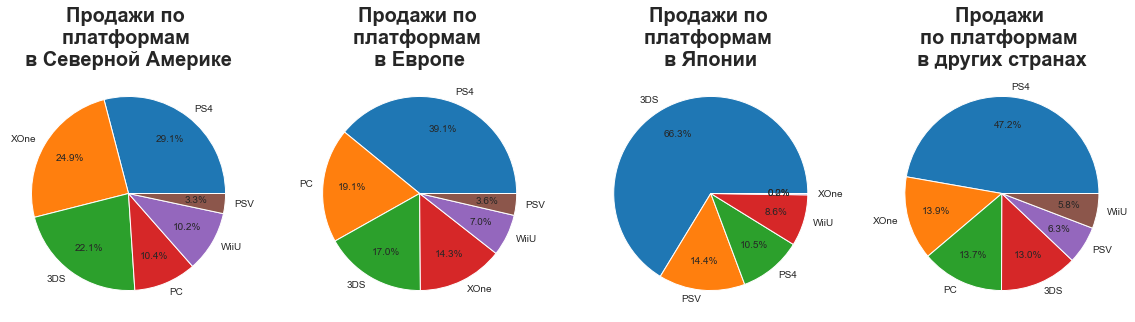

In [29]:
#создадим список с нужными значениями
values = top_current_platforms[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

#соберем функцию, которая будет искать нужные значения из списка в срезе и строить по ним графики:
plt.figure(figsize=(20, 12))

for n, i in enumerate(values):
    ax = plt.subplot(1, 4, n + 1)
    top_current_platforms.pivot_table(index = 'platform', 
                                      values = i, 
                                      aggfunc = 'sum').sort_values(ascending=False, 
                                                                   by = i).plot(kind = 'pie',
                                                                                subplots=True, 
                                                                                ax=ax, 
                                                                                autopct='%1.1f%%',
                                                                                pctdistance=.7)
    title_dict = {'na_sales': 'Продажи по \nплатформам \nв Северной Америке', 
                  'eu_sales': 'Продажи по \nплатформам \nв Европе', 
                  'jp_sales': 'Продажи по \nплатформам \nв Японии', 
                  'other_sales': 'Продажи \nпо платформам \nв других странах'}
    plt.ylabel('')
    plt.title(title_dict[i], fontsize=20, fontweight='bold')
    ax.get_legend().remove()
plt.show()

По графикам видно, что самой популярной платформой исходя из числа проданных игр из актуальных является PlayStation 4. Она превалирует у пользователей из Северной Америки, Европы и в других странах. В Японии фаворитом является Nintendo 3DS: можно предположить, что компания хорошо изучила специфичный родной рынок и именно поэтому остается любимицей пользователей. Пользователи из Северной Америки и Европы меньше всего любят PlayStation Vita, из Японии –– PC и Xbox One, а из других стран - WiiU.

Аналогично изучим популярные жанры для пользователей из каждого региона:

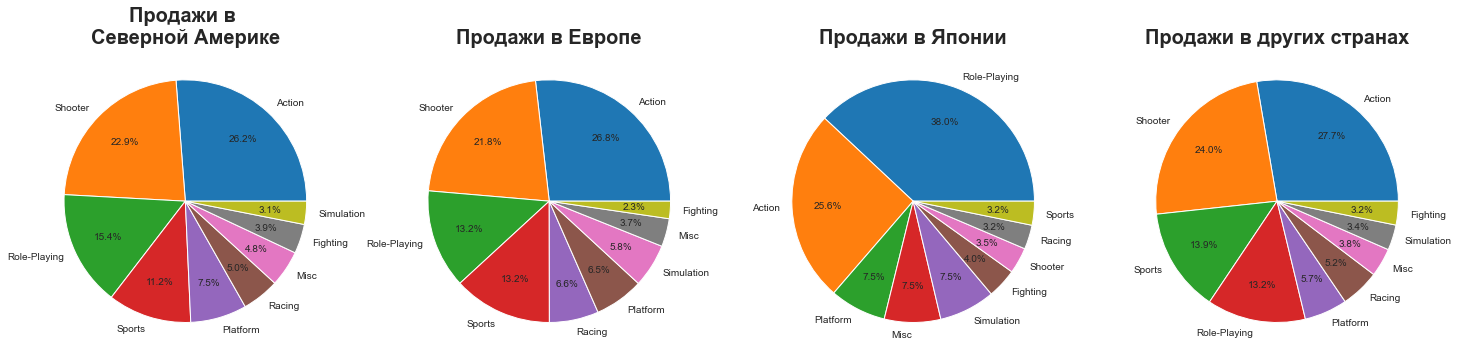

In [30]:
#очистим в новом срезе данные по жанрам
#уберем небольшие сегменты, чтобы сделать читабельной круговую диаграмму
top_genre = ['Shooter', 'Action', 'Role-Playing', 
             'Platform', 'Sports', 'Racing', 'Simulation', 'Misc', 'Fighting']
top_genre_platforms = top_current_platforms.query('genre in @top_genre')

#создадим список с нужными значениями
values = top_genre_platforms[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]


#соберем функцию, которая будет искать нужные значения из списка в срезе и строить по ним графики:
plt.figure(figsize=(25, 15))

for n, i in enumerate(values):
    ax = plt.subplot(1, 4, n + 1)
    top_genre_platforms.pivot_table(index = 'genre', 
                                      values = i, 
                                      aggfunc = 'sum').sort_values(ascending=False, 
                                                                   by = i).plot(kind = 'pie',
                                                                                subplots=True,
                                                                                ax=ax, 
                                                                                autopct='%1.1f%%', 
                                                                                pctdistance=.7)
    title_dict = {'na_sales': 'Продажи в \nСеверной Америке', 
                  'eu_sales': 'Продажи в Европе', 
                  'jp_sales': 'Продажи в Японии', 
                  'other_sales': 'Продажи в других странах'}
    plt.ylabel('')
    plt.title(title_dict[i], fontsize=20, fontweight='bold')
    ax.get_legend().remove()
plt.show()

Мы видим, что чаще всего пользователи из Северной Америки, Европы и других стран предпочитают action-игры и шутеры, а реже всего - пазлы и приключенческие игры. В Японии вкусы другие - на первом месте тут у пользователей RPG-игры, а action-игры на втором месте. Реже всего пользователи из Японии предпочитают стратегии. 

Посмотрим, насколько значим рейтинг ESRB для продаж в регионах:

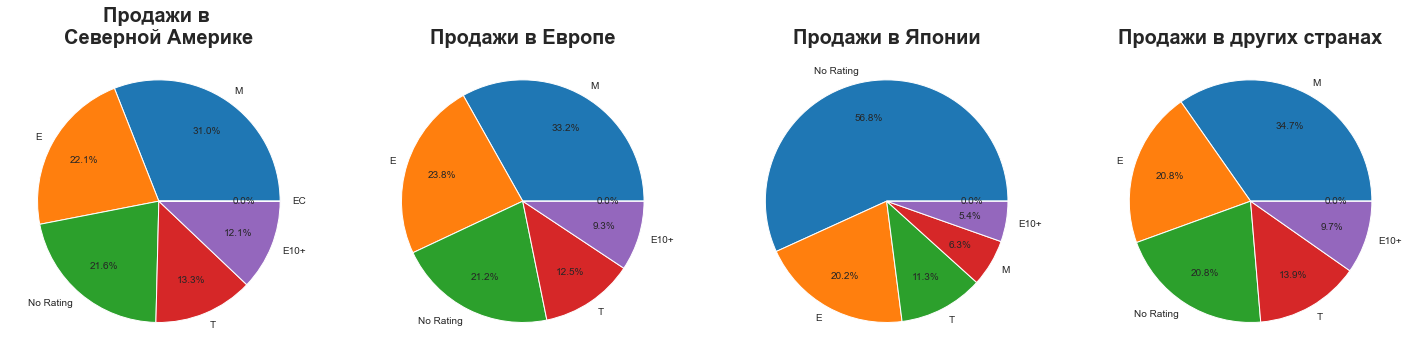

In [31]:
#создадим список с нужными значениями
values = top_genre_platforms[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]


#соберем функцию, которая будет искать нужные значения из списка в срезе и строить по ним графики:
plt.figure(figsize=(25, 15))

for n, i in enumerate(values):
    ax = plt.subplot(1, 4, n + 1)
    top_genre_platforms.pivot_table(index = 'rating', 
                                      values = i, 
                                      aggfunc = 'sum').sort_values(ascending=False, 
                                                                   by = i).plot(kind = 'pie',
                                                                                subplots=True,
                                                                                ax=ax, 
                                                                                autopct='%1.1f%%', 
                                                                                pctdistance=.7)
    title_dict = {'na_sales': 'Продажи в \nСеверной Америке', 
                  'eu_sales': 'Продажи в Европе', 
                  'jp_sales': 'Продажи в Японии', 
                  'other_sales': 'Продажи в других странах'}
    plt.ylabel('')
    plt.title(title_dict[i], fontsize=20, fontweight='bold')
    
    ax.get_legend().remove()
plt.show()

Мы видим, что игры с рейтингом 'M' («Для взрослых») очень мало продавались в Японии по сравнению с Европой и Америкой: 6.3% продаж против 33.2% и 31% соответственно. Это можно объяснить более жесткой модерацией контента в Японии: в играх с этими рейтингами есть кровь, сцены насилия и нецензурная лексика.

Игры для всех пользователей (рейтинг E) одинаково хорошо продаются во всех странах: от 20.2% в Японии до 23.8% в Европе. Похожая доля продаж и у игр для подростков от 13 до 19 лет (рейтинг T): от 11.3% в Японии до 13.9% в других странах. 

### Выводы

****Портрет пользователя в Северной Америке****
1. Любимые платформы - PlayStation 4 (29,1%), Xbox One (24,9%), Nintendo 3DS (22,1%).
2. Любимые жанры - action-игры (26,2%), шутеры (22,9%), RPG (15,4%).
3. Любимые игры по рейтингу - 'M' (игры для взрослых, 31%), 'E' (игры для всех, 22,1%), 'T' (игры для подростков, 13,3%)

****Портрет пользователя в Европе****
1. Любимые платформы - PlayStation 4 (39,1%), PC (19,1%), Nintendo 3DS (17%).
2. Любимые жанры - action-игры (26,8%), шутеры (21,8%), RPG и спортивные игры (по 13,2%).
3. Любимые игры по рейтингу - 'M' (игры для взрослых, 33,2%), 'E' (игры для всех, 23,8%), 'T' (игры для подростков, 12,5%)

****Портрет пользователя в Японии****
1. Любимые платформы - Nintendo 3DS (66,3%), PlayStation Vita (14,4%), PlayStation 4 (10,5%).
2. Любимые жанры - RPG (38%), action-игры (25,6%), платформеры (7,5%).
3. Любимые игры по рейтингу - 'E' (игры для всех, 20,2%), 'T' (игры для подростков, 11,3%), 'M' (игры для взрослых, 6,3%).

****Портрет пользователя в других странах****
1. Любимые платформы -  PlayStation 4 (47,2%), Xbox One (13,9%), PC (13,7%).
2. Любимые жанры - action-игры (27,7%), шутеры (24%), спортивные игры (13,9%).
3. Любимые игры по рейтингу - 'M' (игры для взрослых, 34,7%), 'E' (игры для всех, 20,7%), 'T' (игры для подростков, 13,9%).

### Шаг 5. Проверьте гипотезы

****Гипотеза 1****

Важно понять, являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми.

Cперва сформулируем нулевую и двустороннюю альтернативную гипотезы:

****H0 = Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC**** 

****H1 = Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC**** 

Чтобы проверить гипотезы, воспользуемся методом проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. T-тест будем применять, так как все три параметра соблюдены:

1. В нашем случае выборочные средние распределены близко к нормальному вокруг истинного среднего этой совокупности, так как размер каждой выборки больше нескольких десятков значений.
2. Генеральные совокупности не зависят друг от друга: в выборках у нас данные о пользователях разных платформ, они не пересекаются.
3. Даже если дисперсии генеральных совокупностей не равны, согласно симуляциям, проведенным учеными, тест вряд ли ошибется.

Статистическую значимость возьмем за 0.05: это стандартное значение для проверки гипотез.

In [32]:
xone_avg = top_current_platforms[(top_current_platforms['platform'] == 'XOne') & 
                                 (top_current_platforms['user_score'] > 0)]['user_score']
pc_avg = top_current_platforms[(top_current_platforms['platform'] == 'PC')& 
                                 (top_current_platforms['user_score'] > 0)]['user_score']

results = st.ttest_ind(xone_avg, pc_avg, equal_var=False)

alpha = .05

print(f'p-значение:{results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

print(f'Средний пользовательский рейтинг платформы Xbox One: {xone_avg.mean().round(2)}')
print(f'Средний пользовательский рейтинг платформы PC: {pc_avg.mean().round(2)}')

p-значение:0.9801634129117883
Не удалось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг платформы Xbox One: 6.52
Средний пользовательский рейтинг платформы PC: 6.52


****Вывод:****

Значение p-value больше статистической значимости: это означает, что мы не можем отвергнуть нулевую гипотезу в пользу альтернативной. Гипотеза подтверждает, средние пользовательские рейтинги двух платформ PC и Xbox One равны. У нас пока нет причин утверждать иначе.

Кроме того, эту гипотезу подтверждают и подсчеты средних пользовательских рейтингов.

****Гипотеза 2****

Важно понять, являются ли средние пользовательские рейтинги жанров Action и Sports разными.

Cперва сформулируем нулевую и двустороннюю альтернативную гипотезы:

****H0 = Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports**** 

****H1 = Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports**** 

Чтобы проверить гипотезы, снова воспользуемся методом проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Значение статистической значимости оставим таким же.

In [33]:
action_avg = top_current_platforms[(top_current_platforms['genre'] == 'Action') & 
                                 (top_current_platforms['user_score'] > 0)]['user_score']
sports_avg = top_current_platforms[(top_current_platforms['genre'] == 'Sports')& 
                                 (top_current_platforms['user_score'] > 0)]['user_score']

results = st.ttest_ind(action_avg, sports_avg, equal_var=False)

alpha = .05

print(f'p-значение:{results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

print(f'Средний пользовательский рейтинг жанра Action: {action_avg.mean().round(2)}')
print(f'Средний пользовательский рейтинг платформы PC: {sports_avg.mean().round(2)}')

p-значение:1.2025577414902822e-09
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action: 6.81
Средний пользовательский рейтинг платформы PC: 5.77


****Вывод:****

Значение p-value меньше статистической значимости: это означает, что мы можем отвергнуть нулевую гипотезу в пользу альтернативной. Альтернативная гипотеза утверждает, что средние пользовательские рейтинги двух жанров Action и PC не равны. У нас пока нет причин утверждать иначе.

Кроме того, эту гипотезу подтверждают и подсчеты средних пользовательских рейтингов.

### Шаг 6. Общие выводы

#### Описание и подготовка данных: в каком состоянии датафреймы

- Мы загрузили датафрейм с данными про игровые тайтлы с указанием платформы, года выпуска игры, жанром, продажами в Северной Америке, Европе, Японии и других странах (в млн шт), а еще оценки критиков, пользователей и рейтинг от ESRB. Названия столбцов привелии к змеиному регистру для единства стиля. Отбросили пропуски в столбцах, где их было не критически много: это названия, год выпуска и жанр. Убрали меньше 2% содержания датафрейма: допустимая обработка.


- Поняли, что TBD в столбце с оценками пользователей - аббревиатура to be decided. Заменили ее на ноль, тк фактически оценки пользователей у игры еще нет. Пропуски в столбцах с оценками пользователей и критиков + рейтингом не стали отбрасывать: их слишком много. Создали столбец с суммарными продажами во всех регионах total_sales.


- Пропуски в столбцах с оценками пользователей и критиков + рейтингом отбросить не можем: их слишком много. Вместо этого пока заменим NaN на нули и будем держать в голове эти нули при следующих этапах анализа.


- Проверили датафрейм на наличие явных и неявных дубликатов: их нет.


- Создали столбец с суммарными продажами во всех регионах total_sales.

**Рекомендация для будущих датайфреймов**

- Давайте сразу называть столбцы в датафрейме красиво, маленькими латинскими буквами с подчеркиваниями.


- Очень много пропусков в оценках пользователей и критиков. Давайте обсудим, как эти оценки формируем: может, стоит поменять правила?


- По рейтингу ESRB есть вопрос: как считаем ESRB для Европы и Японии? У них же гораздо более распространены свои рейтинги: PEGI и EOCS. Есть теория, что стоит добавить их в наши локальные версии магазинов: как правило, при выборе региональные пользователи ориентируются на стандарты, принятые в их стране.

#### Исследовательский анализ: что с данными

- Число вышедших игр начинает расти с 1994 года: до этого в год выходило меньше 150 игр. Пик по числу вышедших игр в датафрейме приходится на 2008-2009 годы: тогда их число превысило 1400 релизов в год. Причины - развитие технологий и широкое внедрение ПК. 

- По этим данным можно в целом судить о состоянии индустрии. К 2016 году роста нет ни у одной платформы, что означает медленную гибель: вероятно, из-за роста рынка мобильных приложений и в целом развития мобильных сервисов. Расцвет рынка пришелся на 2008-2009 годы: тогда игроки больше ценили глубину проработки игры и имели стимул сажаться ради этого досуга за консоль или ПК.


-  За актуальный период для дальнейшего анализа взяли период с 2010 по 2016 годы. На этот момент приходится новая тенденция сокращения рынка консолей: топ-5 платформ по продажам стали быстро терять позиции, на смену им начали выходить новые. Кроме того, пик по развитию игр для ПК тоже лежит в этом отрезке.


- Лидер по медианным продажам среди жанров игр 8: Shooter, то есть стрелялки. В среднем один тайтл продает 370 тысяч копий за актуальный период. Нам стоит сделать фокус именно на продвижение игр в этом жанре в следующем году.


#### Кто наши пользователи и что им продавать

- В **Северной Америке** в 2017 году нам стоит сделать ставку на игры под платформы PlayStation 4 (29,1%), Xbox One (24,9%), Nintendo 3DS (22,1%). Среди жанров пользователи из региона выбирают action-игры (26,2%), шутеры (22,9%), RPG (15,4%).


- В **Европе** в 2017 году нам стоит сделать ставку на игры под платформы PlayStation 4 (39,1%), PC (19,1%), Nintendo 3DS (17%). Среди жанров пользователи из региона выбирают action-игры (26,8%), шутеры (21,8%), RPG и спортивные игры (по 13,2%).


- В **Японии** в 2017 году нам стоит сделать ставку на игры под платформы Nintendo 3DS (66,3%), PlayStation Vita (14,4%), PlayStation 4 (10,5%). Среди жанров пользователи из региона выбирают RPG (38%), action-игры (25,6%), платформеры (7,5%).


- В **других странах** в 2017 году нам стоит сделать ставку на игры под платформы PlayStation 4 (47,2%), Xbox One (13,9%), PC (13,7%). Среди жанров пользователи из региона выбирают action-игры (27,7%), шутеры (24%), спортивные игры (13,9%).

#### Что еще влияет на продажи

- На продажи сильно влияет консоль, на которой выходит игра: в топе самых популярных за актуальный период PlayStation 4, Xbox One, Nintendo 3DS. За плечами у этих стоят крупные компании-разработчики игр (Microsoft, Sony, Nintendo) с давно сформированной фан-базой и большими маркетинговыми бюджетами. Нам нужно сделать ставку на игры под эти консоли.

- Вообще рынок консольных и ПК игр падает: на снижение рынка скорее всего повлияло развитие мобильного гейминга. Кажется, нам стоит подумать о развитии нового продукта, связанного с мобильным геймингом. 

- В Японии хуже идут игры с рейтингом для взрослых: вероятно, из-за более строгого возрастного ценза и более молодого возраста игроков. Поэтому там стоит сфокусироваться на играх для всех возрастных аудиторий и играх для подростков.

#### Гипотезы
Проверили две гипотезы:

- Подтвердили, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

- Выявили, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports